In [6]:
print(5)


5


    Uid  Username  Verification status  Net Engagement  Account Reached  \
0     1    user_1                 True        4.674415         5.096488   
1     2    user_2                 True        3.702787         5.339314   
2     3    user_3                 True        7.364944         6.336418   
3     4    user_4                 True        8.484998         6.580938   
4     5    user_5                 True        6.239317         5.350574   
..  ...       ...                  ...             ...              ...   
95   96   user_96                 True        3.950311         5.057779   
96   97   user_97                 True        3.897626         5.488075   
97   98   user_98                 True        3.443586         5.405906   
98   99   user_99                 True        4.805616         5.141328   
99  100  user_100                False       -9.047314         0.167573   

      Report  Net Profile Credit  
0   0.000000            9.770903  
1   0.000000            9.042

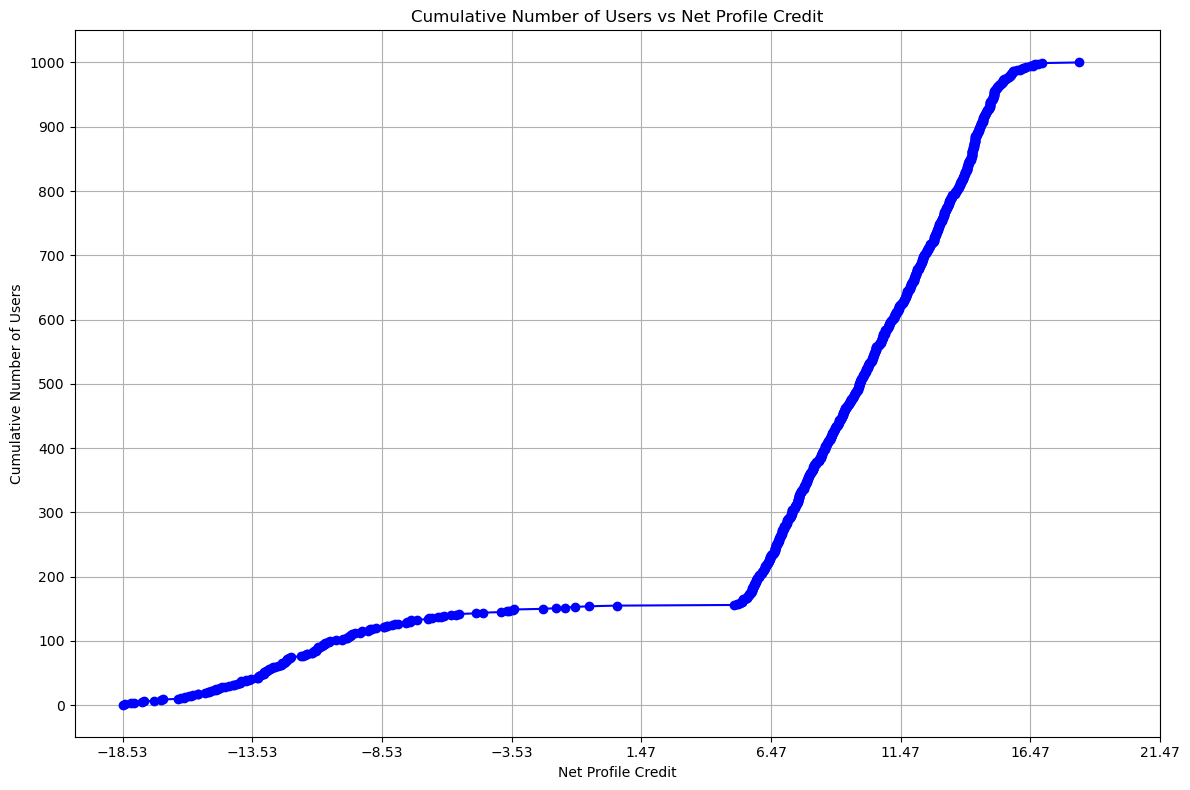

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Number of users
num_users = 1000

# Function to generate unique usernames
def generate_usernames(size):
    return [f'user_{i}' for i in range(1, size + 1)]

# Function to generate exponentially distributed values within range
def exponential_distribution_within_range(size, low, high):
    values = np.random.exponential(scale=1, size=size)
    values = low + (high - low) * (values / np.max(values))  # Scale to fit within [low, high]
    return np.clip(values, low, high)

# Generate the initial DataFrame
df = pd.DataFrame({
    'Uid': range(1, num_users + 1),
    'Username': generate_usernames(num_users),
    'Verification status': np.random.choice([True, False], size=num_users, p=[0.85, 0.15]),
    'Net Engagement': exponential_distribution_within_range(num_users, -10, 10),
    'Account Reached': exponential_distribution_within_range(num_users, 0, 10),
    'Report': np.zeros(num_users),
    'Net Profile Credit': 0
})

# Set conditions based on verification status
verified_indices = df[df['Verification status'] == True].index
unverified_indices = df[df['Verification status'] == False].index

# Adjust Net Engagement for verified accounts to have no negative values
df.loc[verified_indices, 'Net Engagement'] = np.random.uniform(0, 10, size=len(verified_indices))

# Adjust Report for unverified accounts to have random values between -10 and 0
df.loc[unverified_indices, 'Report'] = np.random.uniform(-10, 0, size=len(unverified_indices))

# Adjust Account Reached to ensure unverified accounts have the least values
df.loc[unverified_indices, 'Account Reached'] = exponential_distribution_within_range(len(unverified_indices), 0, 5)
df.loc[verified_indices, 'Account Reached'] = exponential_distribution_within_range(len(verified_indices), 5, 10)

# Calculate Net Profile Credit
df['Net Profile Credit'] = df['Net Engagement'] + df['Account Reached'] + df['Report']

# Display the DataFrame
print(df.head(100))

# Sort DataFrame by Net Profile Credit
df_sorted = df.sort_values(by='Net Profile Credit')

# Compute cumulative count
total_value_counts = df_sorted['Net Profile Credit'].value_counts().sort_index()
cumulative_counts = total_value_counts.cumsum()

# Plot the Line Graph
plt.figure(figsize=(12, 8))
plt.plot(cumulative_counts.index, cumulative_counts.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Number of Users vs Net Profile Credit')
plt.xlabel('Net Profile Credit')
plt.ylabel('Cumulative Number of Users')
plt.grid(True)
plt.xticks(np.arange(df_sorted['Net Profile Credit'].min(), df_sorted['Net Profile Credit'].max() + 5, 5))
plt.yticks(np.arange(0, num_users + 100, 100))
plt.tight_layout()
plt.show()


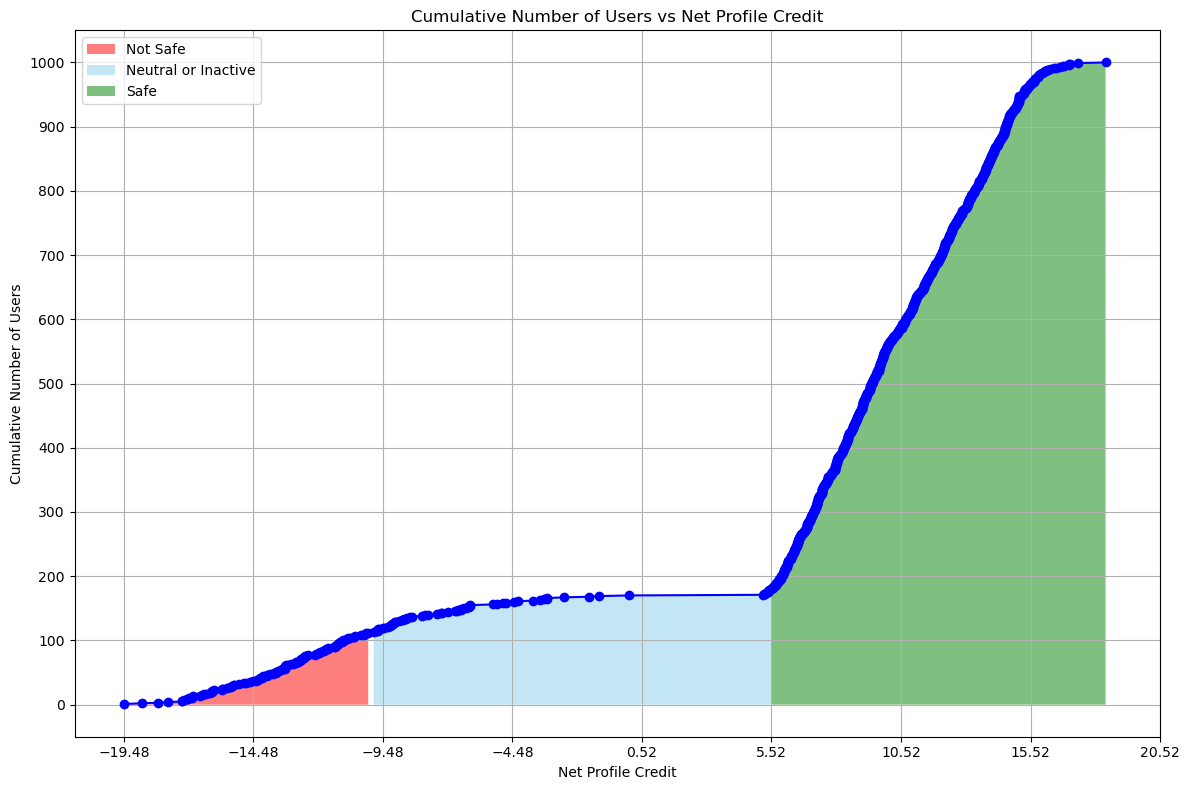

In [130]:
# Plot the Line Graph with labelled areas
plt.figure(figsize=(12, 8))
plt.plot(cumulative_counts.index, cumulative_counts.values, marker='o', linestyle='-', color='b')

# Fill areas
plt.fill_between(cumulative_counts.index, 0, cumulative_counts.values, where=(cumulative_counts.index < -10), 
                 facecolor='red', alpha=0.5, label='Not Safe')
plt.fill_between(cumulative_counts.index, 0, cumulative_counts.values, where=(cumulative_counts.index >= -10) & (cumulative_counts.index <= 5.52), 
                 facecolor='skyblue', alpha=0.5, label='Neutral or Inactive')
plt.fill_between(cumulative_counts.index, 0, cumulative_counts.values, where=(cumulative_counts.index > 5.52), 
                 facecolor='green', alpha=0.5, label='Safe')

# Labels and title for graphs
plt.title('Cumulative Number of Users vs Net Profile Credit')
plt.xlabel('Net Profile Credit')
plt.ylabel('Cumulative Number of Users')
plt.legend(loc='upper left')

# Grid and ticks

plt.grid(True)
plt.xticks(np.arange(df_sorted['Net Profile Credit'].min(), df_sorted['Net Profile Credit'].max() + 5, 5))
plt.yticks(np.arange(0, num_users + 100, 100))
plt.tight_layout()
# Show plot
plt.show()

In [150]:
# Get the usernames of accounts with Net Profile Credit < -10
unsafe_accounts = df[df['Net Profile Credit'] < -10]['Username']

# Print the usernames
print("Usernames of accounts with Net Profile Credit < -10:")
print(unsafe_accounts.tolist())

Usernames of accounts with Net Profile Credit < -200:
['user_10', 'user_14', 'user_23', 'user_26', 'user_36', 'user_45', 'user_54', 'user_62', 'user_67', 'user_73', 'user_97', 'user_109', 'user_111', 'user_114', 'user_128', 'user_140', 'user_156', 'user_166', 'user_182', 'user_193', 'user_194', 'user_202', 'user_238', 'user_243', 'user_265', 'user_267', 'user_280', 'user_282', 'user_302', 'user_313', 'user_315', 'user_329', 'user_337', 'user_349', 'user_380', 'user_383', 'user_396', 'user_399', 'user_401', 'user_407', 'user_408', 'user_418', 'user_427', 'user_430', 'user_441', 'user_443', 'user_465', 'user_473', 'user_480', 'user_483', 'user_484', 'user_485', 'user_492', 'user_496', 'user_498', 'user_507', 'user_524', 'user_547', 'user_551', 'user_553', 'user_556', 'user_558', 'user_559', 'user_561', 'user_567', 'user_572', 'user_574', 'user_579', 'user_580', 'user_589', 'user_608', 'user_612', 'user_632', 'user_642', 'user_650', 'user_653', 'user_683', 'user_685', 'user_686', 'user_68